# Proyecto Final Analítica: Análisis de Datos para pacientes de Parkinson

### Estudiante: Juan Felipe Reyes G
### Código: A00309924

### Profesor: Javier Diaz


In [1]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split


In [2]:
data_orig = pd.read_csv('dataset_variables_parkinson_marcha_K1_pdg.csv', header = 0, names=None, sep=';', decimal=',')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(1, 'Positivo')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(0, 'Negativo')

data_orig

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,JointType,Cycle Number,Cycle Time,Cycle Time Unit,...,Swing Time,Swing Time Unit,Distance,Distance Unit,Duration Time,Duration Time Unit,Speed,Speed Unit,Acceleration,Acceleration Unit
0,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,cf233379-0572-4f08-98e3-4cd34c71c7e1,AnkleRight,1,0.803979,Seconds (average),...,0.670972,Seconds,1.979175,Meters,2.058999,Seconds,0.961232,Meter/Seconds (m/s),0.466844,Meter/Seconds^2 (m/s^2)
1,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,db78663b-09b7-4202-9c53-a71f5d935e7a,AnkleLeft,1,0.701892,Seconds (average),...,0.624083,Seconds,1.890646,Meters,1.357033,Seconds,1.393220,Meter/Seconds (m/s),1.026666,Meter/Seconds^2 (m/s^2)
2,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a17c22de-87f3-4ecc-8461-ed58ee1457fb,AnkleRight,1,0.826989,Seconds (average),...,0.704229,Seconds,1.948560,Meters,2.092554,Seconds,0.931188,Meter/Seconds (m/s),0.445001,Meter/Seconds^2 (m/s^2)
3,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a19237ea-3b4f-41e4-89dc-473547b1c31f,AnkleLeft,1,0.842031,Seconds (average),...,0.858070,Seconds,1.923441,Meters,2.028073,Seconds,0.948408,Meter/Seconds (m/s),0.467640,Meter/Seconds^2 (m/s^2)
4,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,508fe73d-a0a9-4014-bc47-028d40086cba,AnkleRight,1,0.789131,Seconds (average),...,0.718242,Seconds,1.759962,Meters,1.996203,Seconds,0.881655,Meter/Seconds (m/s),0.441666,Meter/Seconds^2 (m/s^2)
5,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,d2cd4af5-182a-4c0a-a0fe-90f814af1491,AnkleLeft,1,0.795529,Seconds (average),...,0.811643,Seconds,1.974094,Meters,2.121983,Seconds,0.930306,Meter/Seconds (m/s),0.438414,Meter/Seconds^2 (m/s^2)
6,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,e4d1a63a-845c-41a9-8497-61fd4c3ba2b4,AnkleRight,1,1.193026,Seconds (average),...,0.953771,Seconds,1.922531,Meters,2.354978,Seconds,0.816369,Meter/Seconds (m/s),0.346657,Meter/Seconds^2 (m/s^2)
7,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,c8e5ff5e-a684-4f5e-9647-af8953685d96,AnkleLeft,1,0.488694,Seconds (average),...,0.871583,Seconds,1.951583,Meters,2.355888,Seconds,0.828385,Meter/Seconds (m/s),0.351623,Meter/Seconds^2 (m/s^2)
8,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,cdc4d546-affd-4eb4-9b48-fe22d4deb862,AnkleRight,1,1.045567,Seconds (average),...,0.892023,Seconds,1.972823,Meters,2.090137,Seconds,0.943872,Meter/Seconds (m/s),0.451584,Meter/Seconds^2 (m/s^2)
9,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,5177e25a-39df-4dfc-8f25-0ec5fbe791d4,AnkleLeft,1,0.834999,Seconds (average),...,0.716997,Seconds,1.858186,Meters,2.011989,Seconds,0.923557,Meter/Seconds (m/s),0.459027,Meter/Seconds^2 (m/s^2)


## EDA

In [3]:
data_orig.describe(include='all')

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,JointType,Cycle Number,Cycle Time,Cycle Time Unit,...,Swing Time,Swing Time Unit,Distance,Distance Unit,Duration Time,Duration Time Unit,Speed,Speed Unit,Acceleration,Acceleration Unit
count,396,396,396.000000,396,396,396,396,396.000000,396.000000,396,...,396.000000,396,396.000000,396,396.000000,396,396.000000,396,396.000000,396
unique,67,2,NaN,2,198,396,2,NaN,NaN,1,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1
top,PK061,Negativo,NaN,M,b129ae91-92ae-454a-bbdc-73b364a47319,7c5282c6-828c-4264-8718-6168f61474d9,AnkleRight,NaN,NaN,Seconds (average),...,NaN,Seconds,NaN,Meters,NaN,Seconds,NaN,Meter/Seconds (m/s),NaN,Meter/Seconds^2 (m/s^2)
freq,6,206,NaN,246,2,1,198,NaN,NaN,396,...,NaN,396,NaN,396,NaN,396,NaN,396,NaN,396
mean,NaN,NaN,66.353535,NaN,NaN,NaN,NaN,1.151515,0.828894,NaN,...,0.955592,NaN,1.917827,NaN,2.417102,NaN,0.903878,NaN,0.468199,NaN
std,NaN,NaN,9.889837,NaN,NaN,NaN,NaN,0.553262,0.232687,NaN,...,0.414512,NaN,0.066272,NaN,1.126328,NaN,0.280004,NaN,0.280871,NaN
min,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,1.000000,0.108028,NaN,...,0.530065,NaN,1.404693,NaN,1.154018,NaN,0.266775,NaN,0.035774,NaN
25%,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,1.000000,0.694336,NaN,...,0.733061,NaN,1.892893,NaN,1.888034,NaN,0.774300,NaN,0.310339,NaN
50%,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,1.000000,0.810769,NaN,...,0.855052,NaN,1.928044,NaN,2.153054,NaN,0.889656,NaN,0.412156,NaN
75%,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,1.000000,0.923322,NaN,...,0.997798,NaN,1.959343,NaN,2.496073,NaN,1.007977,NaN,0.539428,NaN


In [4]:
EP_val = data_orig.Case1_Control0.value_counts()
print(EP_val)
pk_positivo = EP_val[1]/len(data_orig)
pk_negativo = EP_val[0]/len(data_orig)

print("\nPositivos: %0.2f y Negativos: %0.2f" %(pk_positivo, pk_negativo))

Negativo    206
Positivo    190
Name: Case1_Control0, dtype: int64

Positivos: 0.48 y Negativos: 0.52


Al calcular el baseline se puede afirmar con un **52%** que un paciente NO sera diagnosticado con parkinson.

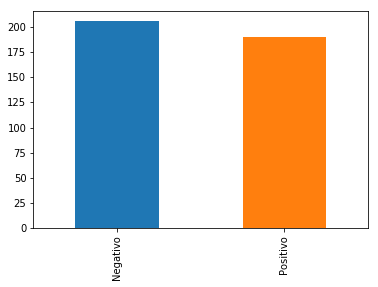

In [5]:
data_orig.Case1_Control0.value_counts().plot.bar()

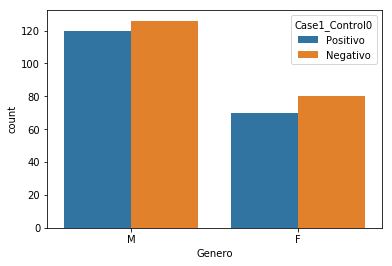

In [6]:
sns.countplot(data=data_orig, hue='Case1_Control0', x='Genero')

Se nota un problema de balanceo de datos para la variable genero, existiendo una mayoria para los hombre en el dataset.

In [7]:
pk_var_num = ['Edad','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration']

### Datos anómalos

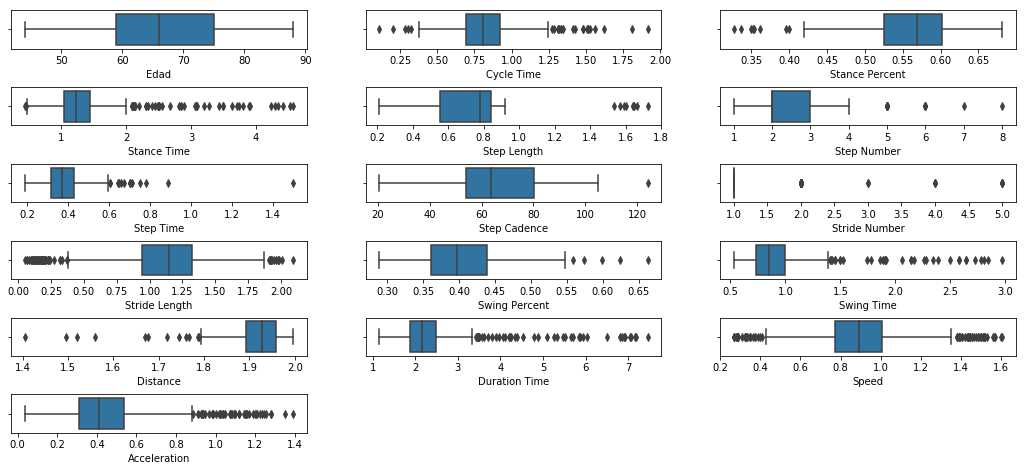

In [8]:
fig = plt.figure(figsize=(18,25))
leng_var_num = len(pk_var_num)
i=0;
for j in range(i,leng_var_num):
    ax = fig.add_subplot(leng_var_num+5,3,j+1)
    sns.boxplot(data=data_orig, x=pk_var_num[j]) 
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=1)

Para algunas variables se eliminan los datos anómalos siguiendo las siguiente condiciones:
  - Cycle time: Los 6 valores más lejanos.
  - Step Time > 1.4
  - Swing Percent: Los 3 valores más lejanos.
  - Distance < 1.6
  - Acceleration: Los 5 valores más lejanos.

In [9]:
temp = data_orig.sort_values(['Cycle Time'], ascending=False)
indexToErase = temp[0:6].index.get_values()

temp = data_orig[data_orig['Step Time'] > 1.4]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig.sort_values(['Swing Percent'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:3].index.get_values())

temp = data_orig[data_orig['Distance'] < 1.6]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig.sort_values(['Acceleration'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:5].index.get_values())


print(data_orig.shape)
data_clean = data_orig.loc[~data_orig.index.isin(indexToErase)]
print(data_clean.shape)

(396, 34)
(377, 34)


In [10]:
# Limpieza dataset usando las variables computables
data_clean = data_clean.loc[:,data_clean.columns.isin(['Case1_Control0','Edad','Genero',
                                                       'JointType','Cycle Time', 'Stance Percent', 'Stance Time',
                                                       'Step Length', 'Step Number', 'Step Time', 'Step Cadence', 
                                                       'Stride Number', 'Stride Length','Swing Percent', 'Swing Time', 
                                                       'Distance', 'Duration Time', 'Speed','Acceleration'])]
print(data_clean.shape)

(377, 19)


In [20]:
data_cleanr = data_clean[data_clean.JointType=='AnkleRight']
data_cleanl = data_clean[data_clean.JointType=='AnkleLeft']

data_cleanr = data_cleanr.drop(['JointType'], axis=1)
data_cleanl = data_cleanl.drop(['JointType'], axis=1)

data_cleanr.index = range(0,len(data_cleanr))
data_cleanl.index = range(0,len(data_cleanl))

print(data_cleanr.shape)
print(data_cleanl.shape)

(190, 18)
(187, 18)


## Reducción de Dimensionalidad

Debido a que son 16 variables variables 18 variables independientes, el proceso de visualización de los datos es difícil, por lo cual es necesario seleccionar los párametros que mejor representen el conjunto de datos. Se usan los siguiente método de selección:  

- Random Forest

In [11]:
data_rndForest = data_clean.loc[:, ~data_clean.columns.isin(['Case1_Control0'])]
rndFrs_x = pd.get_dummies(data_rndForest)
rndFrs_y = data_clean['Case1_Control0']
print(rndFrs_x.shape)
rndFrs_x.head()

(377, 20)


,Edad,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,Stride Number,Stride Length,Swing Percent,Swing Time,Distance,Duration Time,Speed,Acceleration,Genero_F,Genero_M,JointType_AnkleLeft,JointType_AnkleRight
0,79,0.803979,0.644524,1.327075,0.796338,2,0.335486,58.280750,1,1.305580,0.325873,0.670972,1.979175,2.058999,0.961232,0.466844,0,1,0,1
1,79,0.701892,0.517225,0.701892,0.835550,2,0.312041,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666,0,1,1,0
2,79,0.826989,0.633677,1.326004,0.823259,2,0.352115,57.346196,1,1.257234,0.336541,0.704229,1.948560,2.092554,0.931188,0.445001,0,1,0,1
3,79,0.842031,0.553252,1.122035,0.870912,2,0.429035,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640,0,1,1,0
4,79,0.789131,0.610778,1.219237,0.739892,2,0.359121,60.114133,1,1.146374,0.359804,0.718242,1.759962,1.996203,0.881655,0.441666,0,1,0,1


In [12]:
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(rndFrs_x, rndFrs_y, test_size = 0.3)

In [13]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(12345)
rforest = RandomForestClassifier(n_estimators=100,     #Número de modelos a crear 
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                                max_depth=6,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=1000, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
                                max_features=('auto'), # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=True,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                                n_jobs=2,            # Número de cores a utilizar
                                random_state=None,   # random seed para el generador aleatorio
                                verbose=0)  

rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.4824561403508772
Kappa    :  0.0


In [14]:
rforest.oob_score_

0.5247148288973384

In [15]:
print(rforest.feature_importances_)
#np.argsort(rforest.feature_importances_)
rndFrs_x.columns[np.argsort(rforest.feature_importances_)]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Index(['Edad', 'Genero_M', 'Genero_F', 'Acceleration', 'Speed',
       'Duration Time', 'Distance', 'Swing Time', 'Swing Percent',
       'Stride Length', 'Stride Number', 'Step Cadence', 'Step Time',
       'Step Number', 'Step Length', 'Stance Time', 'Stance Percent',
       'Cycle Time', 'JointType_AnkleLeft', 'JointType_AnkleRight'],
      dtype='object')

## Análisis univariado

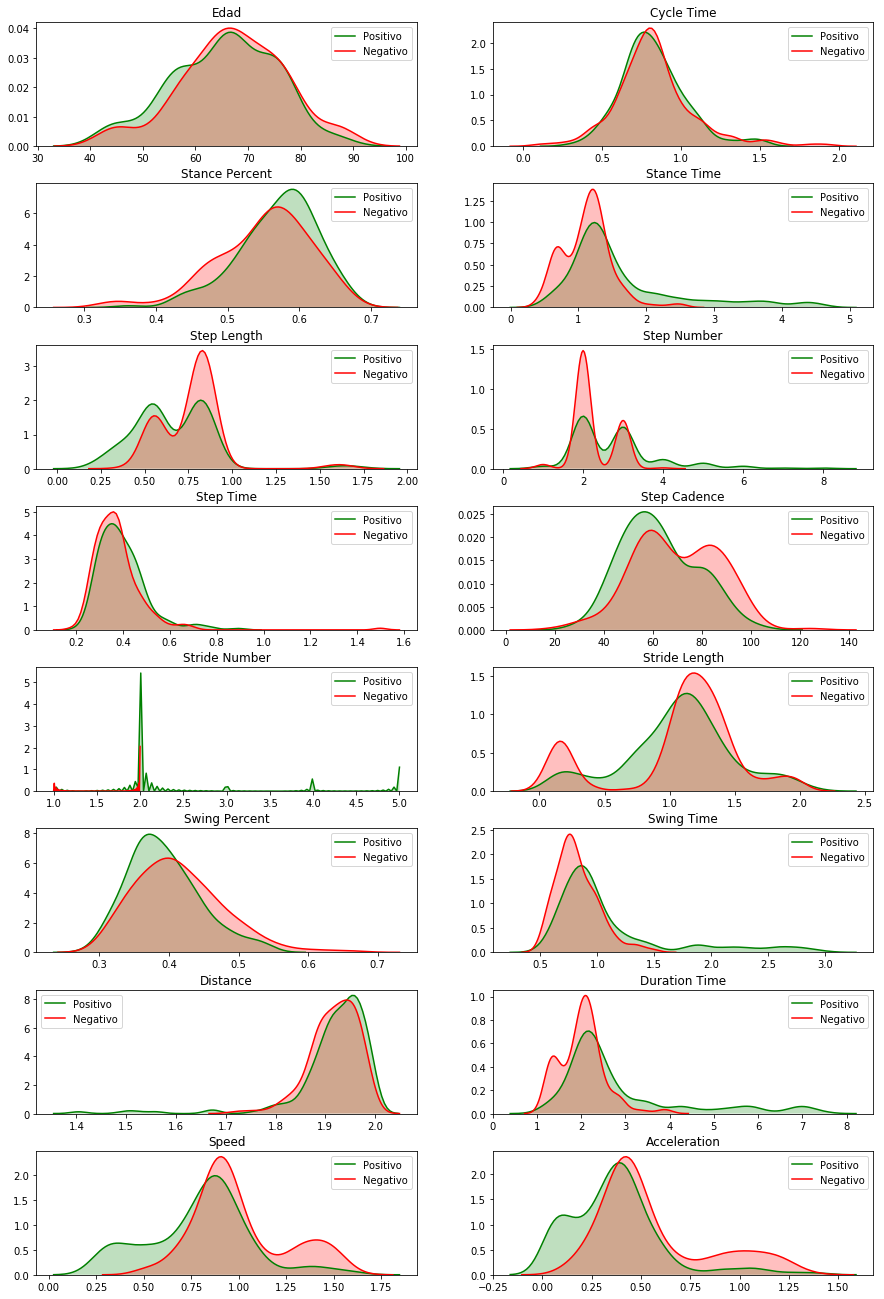

In [16]:
fig = plt.figure(figsize=(15,25))
i = 1
for var_num in pk_var_num:
    ax = fig.add_subplot((len(pk_var_num)/2)+2,2,i)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Positivo'][var_num], shade=True, color='g', ax=ax)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Negativo'][var_num], shade=True, color='r', ax=ax)
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.3)
    plt.legend(['Positivo','Negativo'])
    i+=1

## Análisis Bi-variado

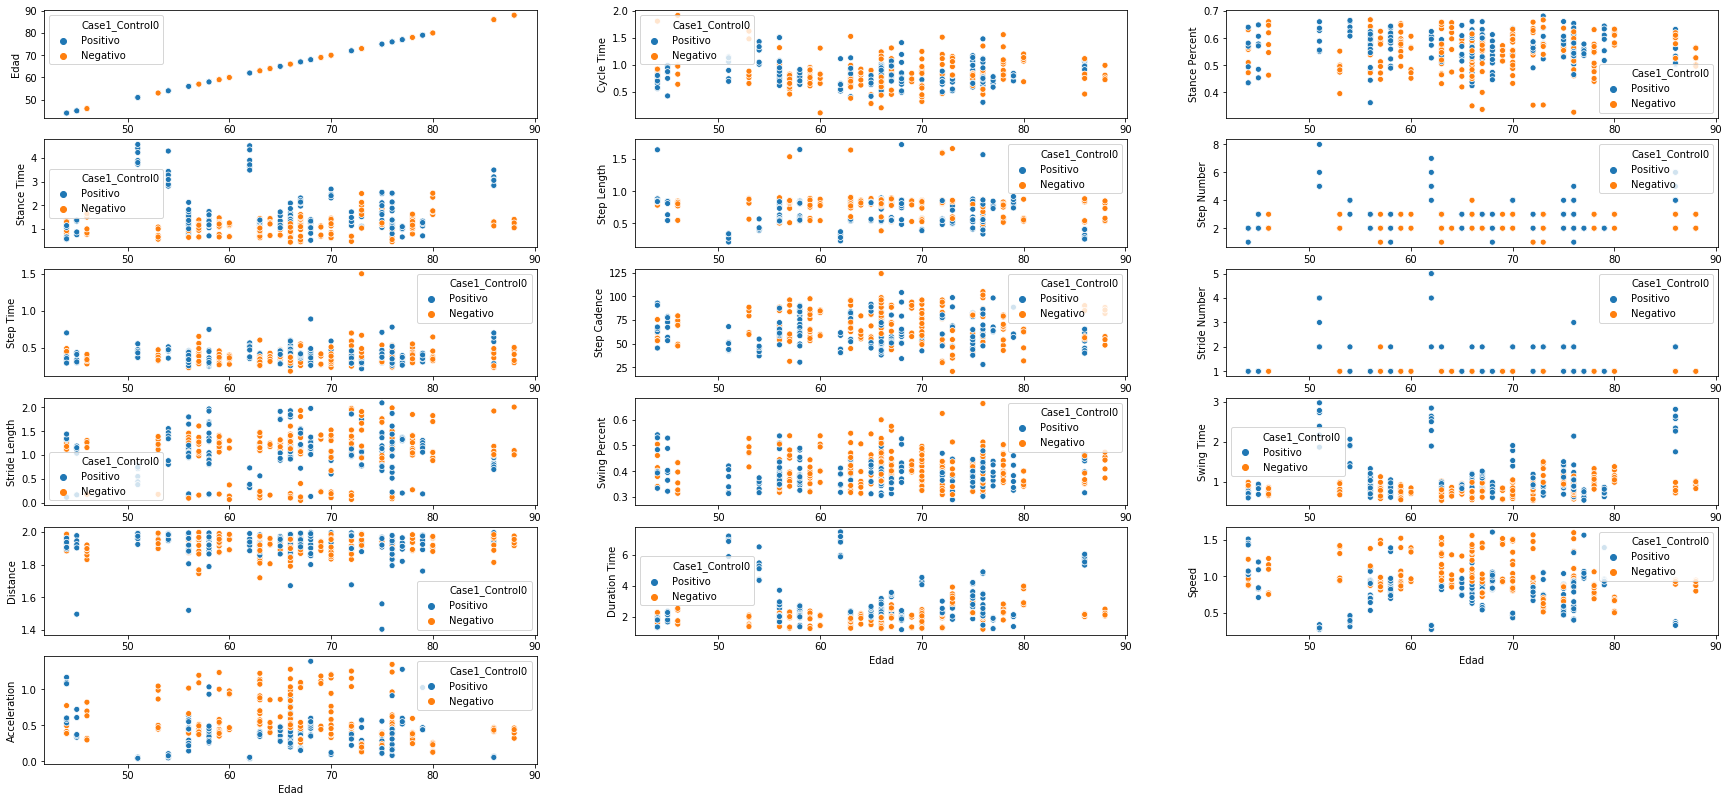

In [17]:
fig = plt.figure(figsize=(30,40))
leng_var_num = len(pk_var_num)
i=0;
for j in range(i,leng_var_num):
    ax = fig.add_subplot(leng_var_num+1,3,j+1)
    sns.scatterplot(x=pk_var_num[i], y=pk_var_num[j], data=data_orig, hue="Case1_Control0", ax=ax)
        

## Reducción de dimensionalidad:

#### Selección de atributos:

Existen varios métodos para la selección de atributos de un dataset:


## Preparación DATASET

In [18]:
# Separación del dataset para estudiar cada tobilo (Variable categorica)


print("Número de AnkleRight: %d " % (len(df_aklr)))
print("Número de AnkleLeft: %d " % (len(df_akll)))

NameError: name 'df_aklr' is not defined

In [ ]:
df_knnl = df_akll
df_knnl = df_knnl.astype('float64', errors='ignore')
print(df_knnl.info())



df_knnl_numeric = df_knn._get_numeric_data()
df_knnl_numeric.head()

In [ ]:
df_knnl_numeric.columns